Write some code to compute the image gradient using x-y separable filters.

In [42]:
import numpy as np
from scipy.signal import sepfir2d
import matplotlib.pyplot as plt

In [43]:
img = 1.0 * plt.imread("assets/al.jpg")  # convert to double
filt = np.array([[-0.1250, -0.2500, -0.1250], [0, 0, 0], [0.1250, 0.2500, 0.1250]])

Determine if the original filter is separable:

In [44]:
U, S, Vt = np.linalg.svd(filt)
# The largest singular value and the corresponding vectors
u1 = U[:, 0]  # First column of U
v1 = Vt[0, :]  # First row of Vt
s1 = S[0]  # Largest singular value

# The outer product of u1 and v1 should approximate the original filter
approx_filter = s1 * np.outer(u1, v1)

# Check if the original filter and the approximated filter are almost equal
if np.allclose(filt, approx_filter):
    print("The filter is separable.")
else:
    print("The filter is not separable.")

The filter is separable.


In [45]:
img_y = sepfir2d(img, v1, u1)
img_x = sepfir2d(img, u1, v1)
img_g = np.sqrt(img_x ** 2 + img_y ** 2)

Text(0.5, 1.0, 'Gradient Magnitude')

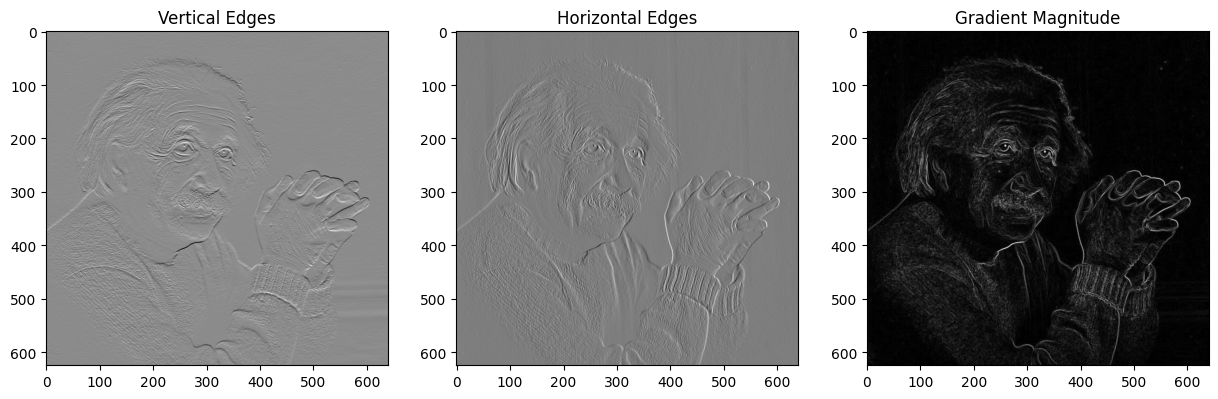

In [46]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_y, cmap="gray")
plt.title("Vertical Edges")
plt.subplot(1, 3, 2)
plt.imshow(img_x, cmap="gray")
plt.title("Horizontal Edges")
plt.subplot(1, 3, 3)
plt.imshow(img_g, cmap="gray")
plt.title("Gradient Magnitude")